## INFO 2950 - Final Project Phase IV
### Name and Net ID: Zilu Li zl327 

This is the final project for INFO2950 done by Zilu Li(net id: zl327) 

*I'm not a native speaker in English, please forgive my language if I'm not using it accurately*

### Introduction

The purpose of this project is to analyze data gathered from the REES46 technology platform regarding the development and marketing progress of eCommerce platform selling cosmetics product. In regards to my main research question, I hope to find a way to predict consumers behavior in purchasing cosmetics product online. Specifically, the goal is to gauge whether or not the time when the event happened, specific user, brand, price, and carting/ viewing behavior would influence the number of purchase of cosmetics product online, and if so, by how much. In addition, I hope to find other interesting pieces of information related to the data, including the user activity and browsing behvior, and the genral performance of ecommerce website. I tried using supervised learning and ensemble learning method to predict the purchase behavior. Among them, I found that the Prediction Model Based on AdaBoost Classification model has the best performance via Hypothesis Testing. Beside of constructing predicting models, I also worked on visualizing the purchasing behavior based on user's properties.




### Dataset Overview
#### Dataset Descriptions
*1. What are the observations(rows) and the attributes(columns)?*

Each **row** in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.  

Each **Column** represents a property.
###### Property and its meaning:
Properties are the **columns** in this dataset.

event_time: Time when event happened at (in UTC).

event_type: view, cart, remove_from_cart, purchase

product_id: ID of a product, but I know it should be categoric

category_id: Product's category ID

category_code: Product's category taxonomy (code name) if it was possible to make it. Usually present for meaningful categories and skipped for different kinds of accessories.

brand: Downcased string of brand name. Can be missed.

price: Float price of a product. Present.

user_id:Permanent user ID.

** user_session**: Temporary user's session ID. Same for each user's session. Is changed every time user come back to online store from a long pause.

Event could be interpreted as:
User(userid) during session (usersession) added to shopping cart (eventtype) product (productid) of brand (brand) of category categorycode (categorycode) with price (price) at (event_time).

----
*2. Why was this dataset created?*

The dataset used for this project [link](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop) is collected by the [REES46 platform](https://rees46.com/), which is one of the most largest and professional Marketing automation and personalization platform for eCommerce. This dataset was created for better visualizes purchasing behaviors using eCommerce and provides marketing information for investors and data scientist.

It contains purchase data from April 2020 to November 2020 from a large cosmetics online store（Anonymous）.

----
*3. Who funded the creation of the dataset?*

The original eCommerce data is sourced from the Open CDC dataset platform [REES46 platform](https://rees46.com/),. It was shared to public by Michael Kechinov on the Kaggle platform

---
*4. What processes might have influenced what data was observed and recorded and what was not?*

Since the original data was collected by a for-profit organization alone, there's potential downside that the dataset might not be collected rigorously due to potential flaws in the collection process. For example, mis-recording of behaviors, etc.

It's also possible that, since the data is collected from a single party, the collector might prefer a specific group of data with traits that'll benefit the REES46 platform in some way. However, since the datasheet in this case is for data analysis and technical use, which has no real marketing influence for REES46 platform itself, I'll assume the accuracy and reliability of the data depends on whether or not the sources and collection process reported their observations rigorously.

---
*5. What preprocessing was done, and how did the data come to be in the form that you are using?*

I first downloaded the raw data as a .csv file from kaggle and converted it into a Pandas dataframe. In the dataframe, I dropped unnecessary columns, filtered our data with missing information, producing a clean dataset with specific purchasing behavior ready for analysis. I also converted the date time to a datetime object and use getdummies() to classify them into 3 time periods: morning, afternoon, and evening

I didn't drop the "category_code" columns containing NaN values at this point of time. This is because I found that if I did so, the cleaned dataset would only contain 1/8 of the orignal dataset. Considering losing a significant portion of the raw data might change the research result. I reserved these data in place. I'll clean the drop the NaN value when constructing model which need to consider the information in category_code later on.

I also used the pandas get_dummies() function to convert the categorical variables in event_type, to be clear-- view, purchase, add_to_cart into a new, binary variable indicating the presence or absence of that level for that variable. The conversion will make further analysis easier.

I also transformed the values in brand into categorical variables. I've done this by sorting out the most frequently appeared brand and turn them into top10,top30,top50,etc. I implemented the same logic on the 'category_code' part and the 'price' part, turning them into 'top1, top3, top5, otherbrand' and '25, 50, 75 percentile' correspondingly. After classifying them with categorical variables. Similarly as dealing with event type, I use the get_dummies() function to make them more computable.



---
*6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?*

The data collection by REES46 was developed to provide data researchers, potential marketing people, and the general public with a dashboard to visualize the ecommerce purchasing behavior. People were not involved with the data collection process. And the contributers(the "user" in this dataset) are not awared of the collection

---
*7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).*


Raw ecommerce data .csv file: https://cornell.box.com/s/c5woe3s0eb8nou0vvmy0dthgkqrbw9bi

The github Repo for final dataset:https://github.com/ZiluLii/INFO-2950-final-project.git

---
### Data Preparation 

Because the data cleaning process is quite specific, I placed it in a seperate jupyter file as appendix.
 
 
The raw data is a 9x4264752 dataset with empty entries. I first dropped NaN value in certain columns(event_type, event_time, brand, price.) 

I didn't drop the "category_code" columns containing NaN values at this point of time. This is because I found that if I did so, the cleaned dataset would only contain 1/8 of the orignal dataset. Considering losing a significant portion of the raw data might change the research result. I reserved these data in place. I'll clean the drop the NaN value when constructing model which need to consider the information in category_code later on.

I also used the pandas get_dummies() function to convert the categorical variables in event_type, to be clear-- view, purchase, add_to_cart into a new, binary variable indicating the presence or absence of that level for that variable. The conversion will make further analysis easier.

I also transformed the values in brand into categorical variables. I've done this by sorting out the most frequently appeared brand and turn them into top10,top30,top50,etc. I implemented the same logic on the 'category_code' part and the 'price' part, turning them into 'top1, top3, top5, otherbrand' and '25, 50, 75 percentile' correspondingly. After classifying them with categorical variables. Similarly as dealing with event type, I use the get_dummies() function to make them more computable.

----


### Preregistration statement

#### 1. Logistic Regression
Insted of listing the purchasing behavior of four type. This time there's only two possibilities for the outcome: purchase/not purchase.

Predictor Variables:

(1)brand popularity (classified into several major type: apparel, appliance, stationary, etc.)

(2)price range(classified into categories between 0-25 percentile;25-50 percentile;50-75 percentile,75percentile and above)

(3)event time range (classified into wee hours(0-6am),morning(6-12am), afternoon(12-18am), evening(18-24am))

(4)category popularity(classified into top1,top3,top5,othercate category according to their frequency)


Using get_dummies to convert these predictor variables into 0 or 1.
Train the model using the training datasets and evaluates its efficiency using the testing sets.

This may help the business determine what type of advetisement(known from"brand", which have their characteristic ads) with how much discount(known from "price", what amount of discount is needed to reach the consumer accepted price) is effective to increase sales. It can also let the business have a better grasp of what time is the preferable(known from "event time") to announce the advertisement. 

#### 2. Decision Tree Classifier

The purpose of using the Decision Tree Classifier is to compare the efficiency and effectiveness between using logistic regression, since I found some uncommon trait while analysing the result of the logistic regression.

To make the comparison fair, I'll be using the same predictor variables in this model, the potential positive influence, and the output variable(purchase/ not purchase) of using the model is exactly the same as the logistic regression model.


#### 3. Ensemble Learnings- Bagging- Random-Forest Classifiers
After constructing models for Preregistration 1 and Preregistration 2, in order to avoid the effects of overfitting, I'll be using ensemble learning(ensemble method) to improve the current algorithm. Ensemble Method, which can be interpreted as the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

I'll first try with the Bagging Method, specifically, I'll be using the random forest classifier for prediction.

The predictors(*Basic Layer*), I'll interprete them as trees, are decision trees in the second part of the preregistration analysis. The output, whether or not purchase, is the same.

#### 4. Ensemble Learnings- Boosting - Adaboost Classifiers

The purpose of using the Adaboost Classifier is to compare the efficiency and effectiveness between using Random Forest Classifier. This is because I notice the single layer classification model is slightly biased due to the unavoidable, I'll explain why it's unavoidable in the following section, skewed data. I'm using the ensemble learning method to add more layers to the analysis. Since there're mainly two types of ensemble method: Boosting and Bagging, and I used the Random Forest Classifiers in the Bagging part, I decided to use the Adaboost model for boosting part.

To make the comparison fair, I'll be using almost everything is the same for AdaBoost prediction model as it is for Random Forest model. The only difference is in how to interpret the number of 'layers' in AdaBoost Model.

Unlike Random Forest, which has 'tree' as predictors(*Basic Layer*). AdaBoost works by changing the weight of misclassified cases(For example, it is non-purchased but was classified as purchase event, and vice versa) in each weak model to train an ensemble one.



#### 5. Hypothesis Testing
In this part of analysis, I want to test the efficiency of using Boosting Method and Bagging Method. I'll be using the f1_score and accuracy score sperately.


* Using f1 score

    Null Hypothesis: f1_scoreboost-f1_scorebag = 0

    There's no difference between using the Boosting Method and Bagging Method. f1_score for Boosting(f1_scoreboost) = f1_score for Bagging(f1_scorebag))

    Alternative Hypothesis f1_scoreboost-f1_scorebag != 0

    There's difference between using the Boosting Method and Bagging Method. f1_score for Boosting(f1_scoreboost) != f1_score for Bagging(f1_scorebag))


* Using accuracy


    Null Hypothesis: accuracy_boost-accuracy_bag = 0

    There's no difference between using the Boosting Method and Bagging Method. accuracy score for Boosting(accuracy_boost) = accuracy score for Bagging(accuracy_bag))

    Alternative Hypothesis accuracy_boost-accuracy_bag != 0

    There's difference between using the Boosting Method and Bagging Method. Accuracy score for Boosting(accuracy_boost) != Accuracy score for Bagging(accuracy_bag))
    
    

#### 6. K-means clustering
Use k-means clustering to plot class size by user behavior, color coded by type of the behavior frequency

Clusters: users with different behavior frequencys

This may show us if certain product type is strongly correspond with particular purchasing behavior

The results may be useful for visualizing the attractiveness of the platform. The more attractive platform, the higher retention rate, which could be found through clusters. See The execution of code for more info.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


---
### Data analysis and Some Exploratory Data Analysis

#### Summarizing & Visualizing Data

First, let's take a glance at the data we've imported as Pandas DataFrames.


**Raw Data (without cleaning)**

In [2]:
raw = pd.read_csv('2020-Jan.csv')
raw.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


**Dataset after cleaning**

In [3]:
cos= pd.read_csv('finaldataset.csv')
cos.pop('Unnamed: 0')
cos.set_index('event_time')
cos.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,cart,...,remove_from_cart,view,date,timepoint,week,timeblocks,is_weehours,is_morning,is_afternoon,is_evening
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0,...,0,1,2020-01-01,00:00:00,1,wee_hours,1,0,0,0
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0,...,0,1,2020-01-01,00:00:09,1,wee_hours,1,0,0,0
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0,...,0,1,2020-01-01,00:00:19,1,wee_hours,1,0,0,0
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0,...,0,1,2020-01-01,00:00:24,1,wee_hours,1,0,0,0
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0,...,0,1,2020-01-01,00:00:25,1,wee_hours,1,0,0,0


**Correlation Matrix**


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Cosmetics Datset', fontsize=15)
    plt.show()



First, I'll focus on the purchasing behavior in general. I'll remove the product_id, user_id, category_id, and user_session to get a more straightforward coefficient matrix.


In [5]:
cos1=cos.copy()
cos1=cos1.dropna()
#cos1.pop('category_code')
#cos1.pop('user_id')
cos1.pop('category_id')
cos1.pop('user_session')
cos1.pop('date')
cos1.pop('timepoint')
cos1.pop('week')
cos1.pop('timeblocks')
cos1.pop('is_weehours')
cos1.pop('is_morning')
cos1.pop('is_afternoon')
cos1.pop('is_evening')



cos1.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,cart,purchase,remove_from_cart,view
359,2020-01-01 00:34:35+00:00,view,5743974,stationery,italwax,1.98,595418733,0,0,0,1
380,2020-01-01 00:36:16+00:00,view,5743974,stationery,italwax,1.98,595418733,0,0,0,1
487,2020-01-01 00:44:22+00:00,cart,5856191,appliances,runail,24.44,530095744,1,0,0,0
907,2020-01-01 01:16:00+00:00,view,5885596,appliances,polarus,102.38,459117441,0,0,0,1
987,2020-01-01 01:25:02+00:00,cart,5824195,apparel,domix,0.94,310843802,1,0,0,0


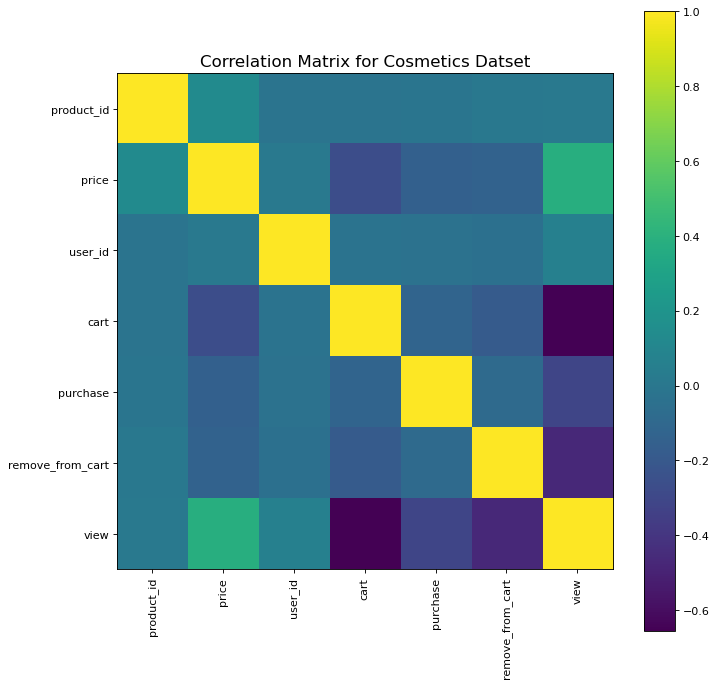

In [6]:
plotCorrelationMatrix(cos1, 10)

**Some Exploratory Data Analysis**

Let's visualize the sales data per day(daily), per week(weekly). And visualize the ecommerce platform users per day (daily) and per week(weekly).

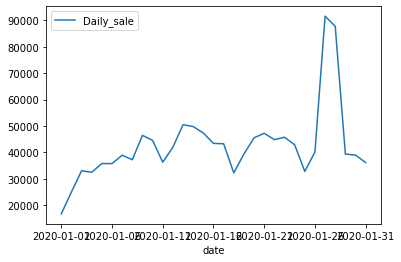

In [7]:
saledaily = cos[cos.event_type == "purchase"].groupby(['date'])['price'].agg(Daily_sale = ('sum')).sort_values(by=['date'],
                                                                                                               ascending=True).plot.line()
saledaily.set_ylabel = "sale_amount"


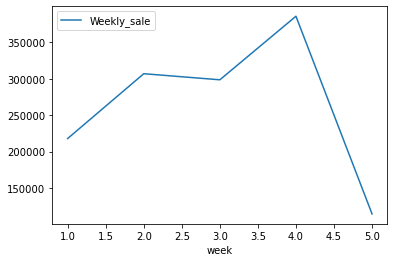

In [8]:
saleweekly = cos[cos.event_type == "purchase"].groupby(['week'])['price'].agg(Weekly_sale = ('sum')).sort_values(by=['week'], 
                                                                                                                 ascending=True).plot.line()
saleweekly.set_ylabel = "sale_amount"


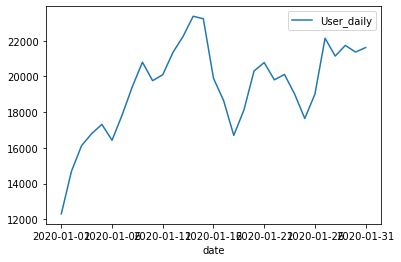

In [9]:
userdaily = cos.groupby(['date'])['user_id'].agg(User_daily =('nunique')).sort_values(
    by=['date'], 
    ascending=True).plot.line()
userdaily.set_ylabel = "user_count"

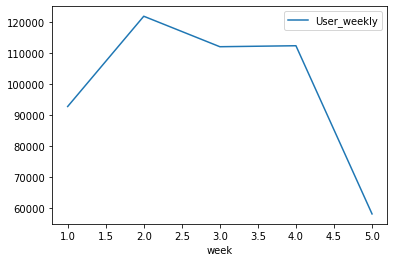

In [10]:
userweekly = cos.groupby(['week'])['user_id'].agg(User_weekly =('nunique')).sort_values(
    by=['week'], 
    ascending=True).plot.line()
userweekly.set_ylabel = "user_count"

**Visualizing the event_type(purchase, cart, remove from cart, and view) using pie chart**

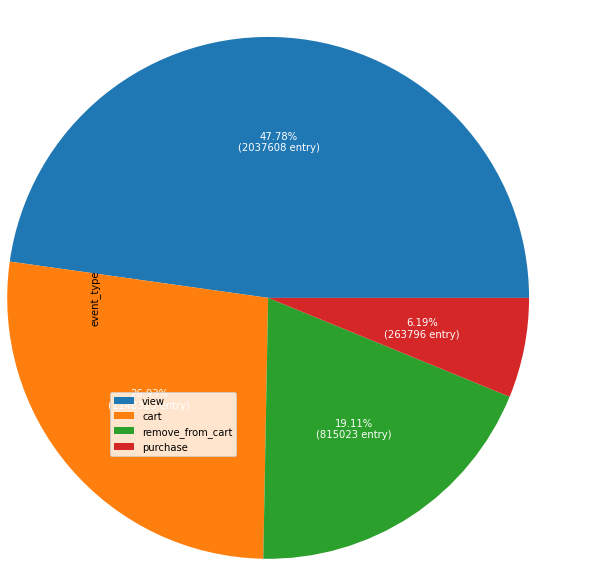

In [11]:
def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.2f}%\n({:d} entry)".format(pct,absolute)

cos_count = cos['event_type'].value_counts()
piecos=cos_count.plot.pie(figsize = (6,6), radius =2,autopct=lambda pct: func(pct, cos_count),textprops=dict(color="w"),legend=True)
piecos.legend(loc=3)

**Visualizing the category popularity('top1c'(most popular category), 'top3c'(top 3 popular category), 'top5c'(top 5 popular category)) using pie chart**

More information about the category popularity can be found in the final report under 'exploratory analysis part'.(Just a few cells below)


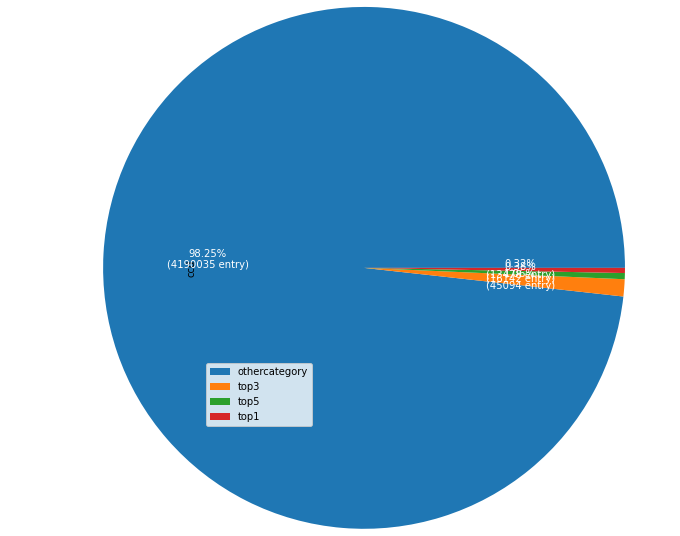

In [102]:
def func2(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.2f}%\n({:d} entry)".format(pct,absolute)

coscopy5=cos.copy()
cate_count = coscopy5['ccd'].value_counts()
pieco2=cate_count.plot.pie(figsize = (6,6), radius =2,autopct=lambda pct: func2(pct, cate_count),textprops=dict(color="w"),legend=True)
pieco2.legend(loc=3)

**Visualizing the brand popularity('top10', 'top30', 'top50','top100','otherwise') using pie chart**

More information about the brand popularity can be found in the final report under 'Modeling'.


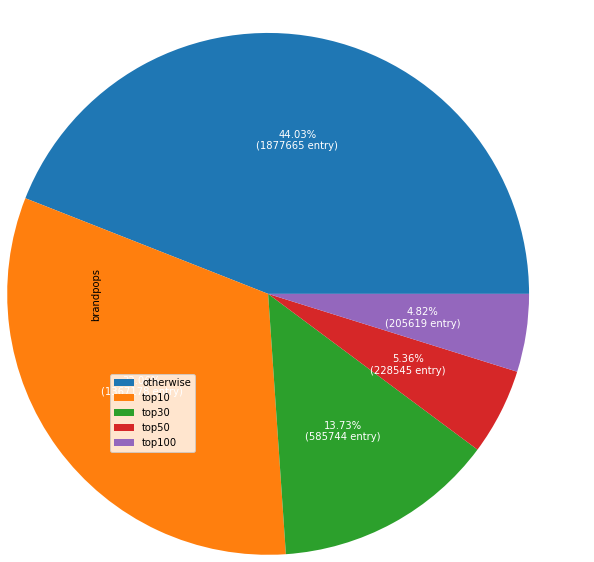

In [103]:
brand_count = coscopy5['brandpops'].value_counts()
pieco3=brand_count.plot.pie(figsize = (6,6), radius =2,autopct=lambda pct: func2(pct, brand_count),textprops=dict(color="w"),legend=True)
pieco3.legend(loc=3)

**Visualizing the price range('first_25p(percentile)', '25p_to_50p (25 percentile to 50 percentile)', '50p_to_75p (50 percentile to 75 percentile)','75p_to_max(75 percentile to max)') using pie chart**

More information about the price range can be found in this file under 'exploratory analysis part'(Just a few cells below)


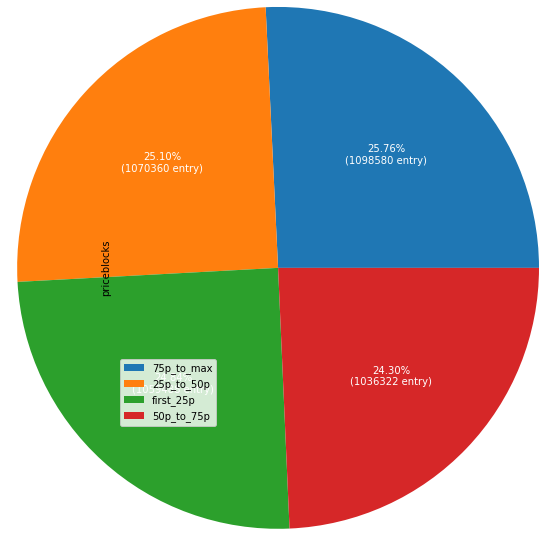

In [104]:
price_count = coscopy5['priceblocks'].value_counts()
pieco3=price_count.plot.pie(figsize = (6,6), radius =2,autopct=lambda pct: func2(pct, price_count),textprops=dict(color="w"),legend=True)
pieco3.legend(loc=3)

**Retention Rate**

Seeing several studies related to consumer behavior(which can be found through the reference section in this final report), I find out that user's retention rate, conversion rate are essential when talking about customer behavior studies.

The Retention Rate is the percentage of people who continue to use the online platform to consume cosmetics product over a given period of time.

In this project, I'll be focusing on calculating the **weekly retention rate**.

By definition, weekly retention rate = (number of the users online that are still online in the following week)/(total users in the week)

Text(0.5, 1.0, 'Weekly retention rate in Jan-2020 ')

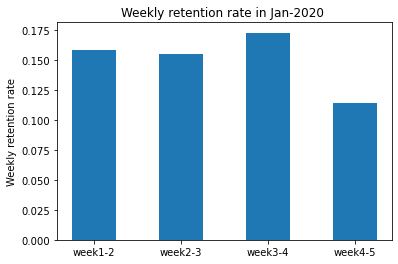

In [12]:
weeklyusers = cos.groupby(['week'])['user_id'].unique().to_list()
retention_list = [len(list(set(i)&set(j)))/len(list(i)) for i, j in zip(weeklyusers[:5], weeklyusers[1:])]
plt.bar(np.arange(4), retention_list, width = 0.5)
plt.ylabel("Weekly retention rate")
plt.xticks(np.arange(4), ["week1-2", "week2-3", "week3-4", "week4-5"])
plt.title("Weekly retention rate in Jan-2020 ")

**Understanding the user conversion rate**

Conversion rate is defined percentage of purchases in a specific period.

Thus, by definition. 

**The daily conversion rate** should be (the number of the users that purchase in a day)/ (total users in a day.)

**The monthly conversion rate** should be (the number of the users that purchase in a month)/ (total users in a month)

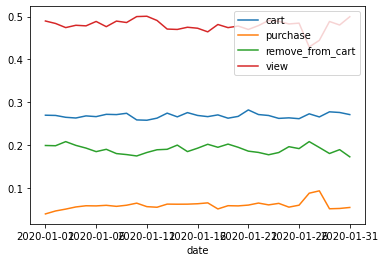

In [13]:
# daily conversion rate
dailyconversionr = cos.groupby(['date'])['event_type'].value_counts(['event_type']).unstack(level = -1).plot.line()
dailyconversionr.legend(loc='best')
#dailyconversionr.set_xticks(['2020-01-01','2020-01-10','2020-01-20','2020-01-31'])


In [14]:
# monthly coversion rate
len(cos[cos['event_type'] == "purchase"]['user_id'].unique())/len(cos.user_id.unique())


0.0688170155069951

Also, Let's take a glance at the information about price in this dataset.

In [15]:
cos['price'].describe()

count    4.264752e+06
mean     8.714595e+00
std      1.963932e+01
min      0.000000e+00
25%      2.350000e+00
50%      4.060000e+00
75%      7.140000e+00
max      3.277800e+02
Name: price, dtype: float64

In [16]:
def get_price(x):
    price_25= 2.350000e+00
    price_50= 4.060000e+00
    price_75=7.140000e+00
    if x<price_25:
        return 'first_25p'
    elif x<price_50:
        return '25p_to_50p'
    elif x<price_75:
        return '50p_to_75p'
    else:
        return '75p_to_max'
    

In [17]:
cos['priceblocks'] = cos['price'].map(get_price)

Visualizing the pattern of the distribution of different price blocks(or range)

(array([1036323.,       0.,       0., 1070360.,       0.,       0.,
        1098581.,       0.,       0., 1059488.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

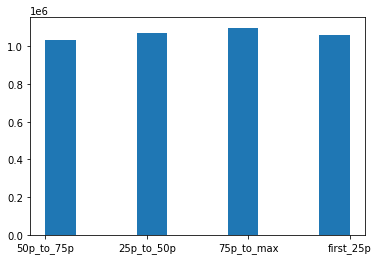

In [18]:
plt.hist(cos['priceblocks'])

As seen in the graph above, '75 percentile to maximum' has the most of the observation while '50 percentile to 75 percentile' contains the fewest number of observation.


Then, I'll turn these categorical variables into computing form by using the pd.get_dummies() function. This step is convenient for the logistic regression part of the analysis.

In [19]:
cos['first_25p']=pd.get_dummies(cos['priceblocks'])['first_25p']
cos['25p_to_50p']=pd.get_dummies(cos['priceblocks'])['25p_to_50p']
cos['50p_to_75p']=pd.get_dummies(cos['priceblocks'])['50p_to_75p']
cos['75p_to_max']=pd.get_dummies(cos['priceblocks'])['75p_to_max']

cos.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,cart,...,timeblocks,is_weehours,is_morning,is_afternoon,is_evening,priceblocks,first_25p,25p_to_50p,50p_to_75p,75p_to_max
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0,...,wee_hours,1,0,0,0,50p_to_75p,0,0,1,0
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0,...,wee_hours,1,0,0,0,25p_to_50p,0,1,0,0
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0,...,wee_hours,1,0,0,0,25p_to_50p,0,1,0,0
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0,...,wee_hours,1,0,0,0,50p_to_75p,0,0,1,0
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0,...,wee_hours,1,0,0,0,25p_to_50p,0,1,0,0


In order to make the classification part easy, I'll apply the same logics on the brand part of the data.

To begin, I'll first look at the top few brand.

I'll sort the brand column into factor different range according it's frequency, aka(how common is a brand being purchased)

In [20]:
coscopy1 = cos.copy()

coscopy1 = coscopy1.dropna(subset=['brand'])

coscopy1 = coscopy1.loc[coscopy1['event_type']=='purchase']


cos['top'] = coscopy1['brand']

top10 = cos.top.value_counts()[:10].sort_values(ascending=False)

top30 = cos['top'].value_counts()[10:30].sort_values(ascending=False)

top50 = cos['top'].value_counts()[30:50].sort_values(ascending=False)

top100 = cos['top'].value_counts()[50:100].sort_values(ascending=False)


In [21]:
def get_brand(x):
    if len(str(x)) > 0:
        if x in top10:
            return 'top10'
        elif x in top30:
            return 'top30'
        elif x in top50:
            return 'top50'
        elif x in top100:
            return 'top100'
        else:
            return 'otherwise'



In [22]:
cos['brandpops'] = cos['brand'].map(get_brand)

In [23]:
cos['brandpops']
#cos['brand']

0              top10
1              top50
2              top30
3          otherwise
4          otherwise
             ...    
4264747    otherwise
4264748    otherwise
4264749    otherwise
4264750    otherwise
4264751    otherwise
Name: brandpops, Length: 4264752, dtype: object

In [24]:
cos['top10']=pd.get_dummies(cos['brandpops'])['top10']
cos['top30']=pd.get_dummies(cos['brandpops'])['top30']
cos['top50']=pd.get_dummies(cos['brandpops'])['top50']
cos['top100']=pd.get_dummies(cos['brandpops'])['top100']
cos['otherbrand']=pd.get_dummies(cos['brandpops'])['otherwise']

cos.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,cart,...,25p_to_50p,50p_to_75p,75p_to_max,top,brandpops,top10,top30,top50,top100,otherbrand
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0,...,0,1,0,NaN,top10,1,0,0,0,0
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0,...,1,0,0,NaN,top50,0,0,1,0,0
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0,...,1,0,0,NaN,top30,0,1,0,0,0
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0,...,0,1,0,NaN,otherwise,0,0,0,0,1
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0,...,1,0,0,NaN,otherwise,0,0,0,0,1


In [25]:
coscopy2 = cos.copy()
coscopy2['category_code'].dropna()

154        accessories
359         stationery
380         stationery
487         appliances
506         appliances
              ...     
4264525    accessories
4264534    accessories
4264594      furniture
4264721        apparel
4264738     appliances
Name: category_code, Length: 74719, dtype: object

In [26]:
coscopy2 = coscopy2.loc[coscopy2['event_type']=='purchase']

top1cate = coscopy2.category_code.value_counts()[:1].sort_values(ascending=False)

top3cate = coscopy2.category_code.value_counts()[:3].sort_values(ascending=False)

top5cate = coscopy2.category_code.value_counts()[3:5].sort_values(ascending=False)

top6cate = coscopy2.category_code.value_counts()[5:10].sort_values(ascending=False)

print('top6: ' +str(top6cate))
print(" ")
print('top5: ' + str(top5cate))

top6: Series([], Name: category_code, dtype: int64)
 
top5: furniture      294
accessories     64
Name: category_code, dtype: int64


Thus, we can find out that there's only 5 unique category_code. I'll apply the same method with the categorical variables at here.

In [27]:
def get_cate(x):
    if len(str(x)) > 0:
        if x in top1cate:
            return 'top1'
        elif x in top3cate:
            return 'top3'
        elif x in top5cate:
            return 'top5'
        else:
            return 'othercategory'



In [28]:
cos['ccd'] = cos['category_code'].map(get_cate)

In [29]:
cos['top1c']=pd.get_dummies(cos['ccd'])['top1']
cos['top3c']=pd.get_dummies(cos['ccd'])['top3']
cos['top5c']=pd.get_dummies(cos['ccd'])['top5']
cos['othercate'] = pd.get_dummies(cos['ccd'])['othercategory']

In [30]:
cos.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,cart,...,top10,top30,top50,top100,otherbrand,ccd,top1c,top3c,top5c,othercate
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0,...,1,0,0,0,0,othercategory,0,0,0,1
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0,...,0,0,1,0,0,othercategory,0,0,0,1
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0,...,0,1,0,0,0,othercategory,0,0,0,1
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0,...,0,0,0,0,1,othercategory,0,0,0,1
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0,...,0,0,0,0,1,othercategory,0,0,0,1


# Modeling-- Supervised Learning


After a brief exploratory data analysis, let's take a deep look into the modeling process. In this section, I'll focus on practicing the. exploratory data analysis I brought up in the preregistration analysis section.

### 1. Multi-variable Logistic Regression

**Predictor Variables**

(1)brand popularity (classified into several major type: apparel, appliance, stationary, etc.)

(2)price range(classified into categories between 0-25 percentile;25-50 percentile;50-75 percentile,75percentile and above)

(3)event time range (classified into wee hours(0-6am),morning(6-12am), afternoon(12-18am), evening(18-24am))

(4)category popularity(classified into top1,top3,top5,othercate category according to their frequency)

Before the constructing the logistic regression model, let's take a glance at the current columns of the cos dataset.

In [31]:
cos.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'cart',
       'purchase', 'remove_from_cart', 'view', 'date', 'timepoint', 'week',
       'timeblocks', 'is_weehours', 'is_morning', 'is_afternoon', 'is_evening',
       'priceblocks', 'first_25p', '25p_to_50p', '50p_to_75p', '75p_to_max',
       'top', 'brandpops', 'top10', 'top30', 'top50', 'top100', 'otherbrand',
       'ccd', 'top1c', 'top3c', 'top5c', 'othercate'],
      dtype='object')

Among them, the columns I want to use for prediction are: 

In [32]:
predictors = ['cart', 'remove_from_cart', 'view', # event_type
              'is_weehours', 'is_morning', 'is_afternoon', 'is_evening', #timeblocks
              'first_25p', '25p_to_50p', '50p_to_75p', '75p_to_max', # price percentile
              'top10','top30', 'top50', 'top100', 'otherbrand', # brand popularity
              'top1c', 'top3c', 'top5c', 'othercate' #category popularity
             ]

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

# fit logit model and print learned parameters
purchase_model = LogisticRegression().fit(
    cos[predictors],
    cos['purchase'])

print("The coefficient for the purchase model is "+str(purchase_model.coef_))
print("The interception for the purchase model is "+str(purchase_model.intercept_))

    
    

The coefficient for the purchase model is [[-1.94118458e+01 -1.90778118e+01 -1.99063945e+01 -3.53758419e-02
   5.42962873e-02  1.80813686e-02 -3.76097182e-02  1.45010731e-01
   1.28885883e-02 -2.12244823e-02 -1.37282741e-01  8.16560115e-03
   2.73881109e-03  4.31585451e-02 -4.98237252e-02 -4.84713642e-03
   9.00559960e-02 -2.54818878e-02 -6.21785402e-02 -3.00347220e-03]]
The interception for the purchase model is [8.38642988]


In [56]:
# absent any information about a ecommerce event, predict the probability that one would purchase
purchase_model.intercept_

array([8.38642988])

In [58]:
# print the coefficients legibly
for i, predictor in enumerate(predictors):
    print(f'{purchase_model.coef_[0,i]:.3f}\t{predictor}')

-19.412	cart
-19.078	remove_from_cart
-19.906	view
-0.035	is_weehours
0.054	is_morning
0.018	is_afternoon
-0.038	is_evening
0.145	first_25p
0.013	25p_to_50p
-0.021	50p_to_75p
-0.137	75p_to_max
0.008	top10
0.003	top30
0.043	top50
-0.050	top100
-0.005	otherbrand
0.090	top1c
-0.025	top3c
-0.062	top5c
-0.003	othercate


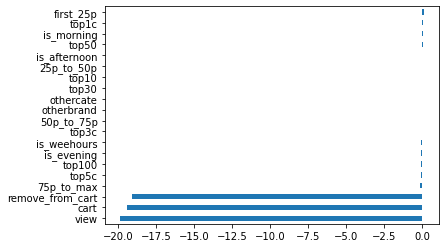

In [34]:
# plot predictors by lean
cos1 = pd.DataFrame({'coef':purchase_model.coef_[0]}, index=cos[predictors].columns)
cos1.sort_values(by='coef').plot.barh(legend=False);

As we can seen in the graph above, the event_type influence the purchase behavior significantly, which also takes up a huge percentage of the graph. To see other factors influence. Reconstruct the graph again, this time, excluding the event_type from the predictors variable.

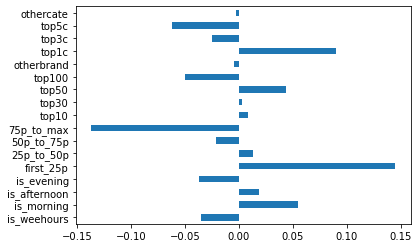

In [38]:
predictor2 = [
              'is_weehours', 'is_morning', 'is_afternoon', 'is_evening', #timeblocks
              'first_25p', '25p_to_50p', '50p_to_75p', '75p_to_max', # price percentile
              'top10','top30', 'top50', 'top100', 'otherbrand', # brand popularity
              'top1c', 'top3c', 'top5c', 'othercate' #category popularity
             ]

cos3 = pd.DataFrame({'coef':purchase_model.coef_[0][3:]}, index=cos[predictor2].columns)
cos3.plot.barh(legend=False);

In [59]:
#Using fewer predictors
# fit logit model and print learned parameters using less predictors(excluding those event_type)
purchase_model2 = LogisticRegression().fit(
    cos[predictor2],
    cos['purchase'])

print("The coefficient for the purchase model is "+str(purchase_model2.coef_))
print("The interception for the purchase model is "+str(purchase_model2.intercept_))


The coefficient for the purchase model is [[-0.42495773 -0.25304247 -0.32396128 -0.43966996  0.02311504 -0.29609751
  -0.41461055 -0.75403843 -0.26564786 -0.27156555 -0.19100367 -0.42559761
  -0.28781674  0.33550781 -0.42639561 -1.02846081 -0.32228282]]
The interception for the purchase model is [-1.44628703]


In [60]:
# Using fewer predictors
#absent any information about a ecommerce event, predict the probability that one would purchase
purchase_model2.intercept_

array([-1.44628703])

The intercept shows that it's very unlikely for a user to purchase anything without knowing any information about the event.

In [62]:
# Using fewer predictors
# print the coefficients legibly
for i, predictor in enumerate(predictor2):
    print(f'{purchase_model2.coef_[0,i]:.3f}\t{predictor}')

-0.425	is_weehours
-0.253	is_morning
-0.324	is_afternoon
-0.440	is_evening
0.023	first_25p
-0.296	25p_to_50p
-0.415	50p_to_75p
-0.754	75p_to_max
-0.266	top10
-0.272	top30
-0.191	top50
-0.426	top100
-0.288	otherbrand
0.336	top1c
-0.426	top3c
-1.028	top5c
-0.322	othercate


In [47]:
# train-test split (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(
    cos[predictor2], 
    cos['purchase'], test_size= 0.2)

print("The number of training dataset and testing dataset: ")
print(len(y_train), len(y_test))


The number of training dataset and testing dataset: 
3411801 852951


In [63]:
# fit on train data, and uses the fitted model for data prediction on the testing data
testing_model = LogisticRegression().fit(X_train, y_train)

y_pred = testing_model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
from sklearn.metrics import accuracy_score

acscore  =  accuracy_score(y_test, y_pred, normalize=False)

print("Number of correct prediction: "+str(acscore))

acpercent = acscore/len(y_test)
print("Percentage of correct prediction: "+str(acpercent*100))



Number of correct prediction: 799972
Percentage of correct prediction: 93.78874050209215


In [70]:
# cross validation
scores = cross_val_score(
    LogisticRegression(), 
    cos[predictor2], 
    cos['purchase'], 
    cv=10
)
print(scores)
print(f'Mean score: {scores.mean()}')



[0.93814423 0.93814423 0.93814643 0.93814643 0.93814643 0.93814409
 0.93814409 0.93814409 0.93814409 0.93814409]
Mean score: 0.9381448206135257


In [73]:
#baseline

baseline = y_test.sum()/len(y_test)
print('The baseline for the model is: ' +str(baseline))

The baseline for the model is: 0.06211259497907852


It's straightforward to see that the mean score of the constructed logistic regression model, purchase_model2, is significantly higher than the baseline of the model. Thus, it's confident to assume that the model is effective.

I'll display the confusion matrix to show the stats of accuracy. To make it easier for intepretation, in other words, to better correlate with the statistical knowledge of Type1 Type2 error, I'll transform the 1,0 in the purchase column into True, False.

In [89]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

# true labels and predicted labels
y_true = cos['purchase']
y_pred = purchase_model2.predict(cos[predictor2])

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_true, y_pred))

Confusion matrix
[[4000955       0]
 [ 263797       0]]


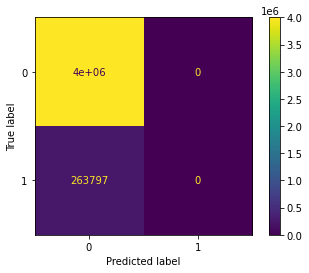

In [90]:
# visualize confusion matrix
plot_confusion_matrix(
    purchase_model2, 
    cos[predictor2], 
    y_true, 
    #normalize='true'
)
plt.show()

In [84]:
 # classification report
print(classification_report(y_true, y_pred))

/Users/zilu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97   4000955
           1       0.00      0.00      0.00    263797

    accuracy                           0.94   4264752
   macro avg       0.47      0.50      0.48   4264752
weighted avg       0.88      0.94      0.91   4264752



Seen from the above report, there's an extremely uneven distribution between '0' and '1'. Thus, I'll redo the constructing model through resampling. This time, I'll be using **ensemble method** to reduce the effect of the extremely skewed distribution between number of purchase to the number of non-purchase. This phenomenon indicates that **F1-score is a more preferable indicators of model effectivaness, which is the combination of Precission(Accuracy) and Recall(Reliability)**


**Unavoidable Potential Limitation**
Normally, when evaluate the binary output of certain attributes, I could clean the data to ensure a roughly equal distribution between 0 and 1. **However, I could not do this in this step after thoughtful consideration.** (I also discussed this concern with some of the TAs)This is due to the property of this study: I'm trying to establish a model predicting whether a consumer would purchase a product. In the '0' circumstances, people cart, remove from cart, and view the product. These events are essential of purchasing event. If I remove them from the dataset, I'll get very biased sample. Thus, I decide to continuing include them as '0' in my dataset. I'll also study them seperately in this final report.

* Visualizing the effect of other event_type('cart','view','remove_from_cart')

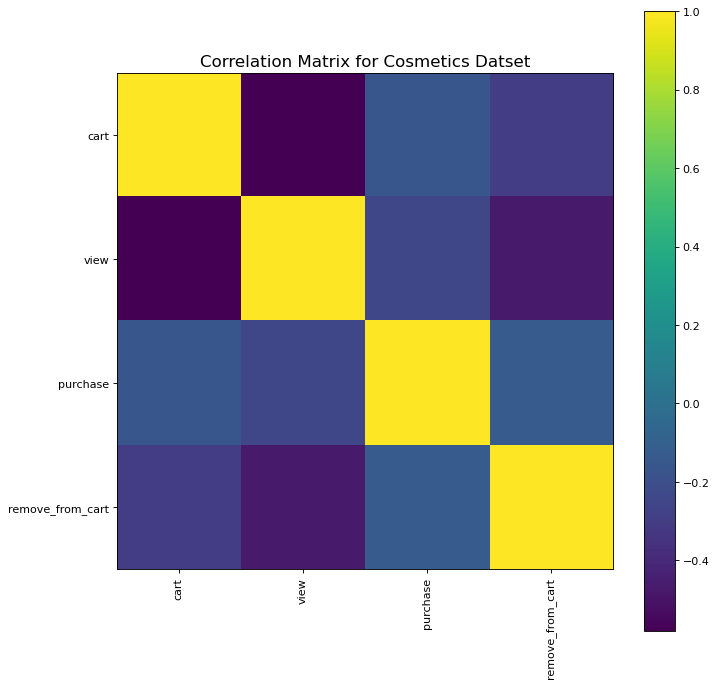

In [111]:
plotCorrelationMatrix(cos[['cart','view','purchase','remove_from_cart']], 10)

### Decision Tree Classifier

Predictor Variables(Predictor2) includes:

(1)brand popularity (classified into several major type: apparel, appliance, stationary, etc.)

(2)price range(classified into categories between 0-25 percentile;25-50 percentile;50-75 percentile,75percentile and above)

(3)event time range (classified into wee hours(0-6am),morning(6-12am), afternoon(12-18am), evening(18-24am))

(4)category popularity(classified into top1,top3,top5,othercate category according to their frequency)

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dc_clf = DecisionTreeClassifier(random_state=0) #Initializing the decision tree model
dc_scores = cross_val_score(dc_clf, cos[predictor2], cos.purchase, cv=10)
dc_scores

array([0.93814423, 0.93814423, 0.93814643, 0.93814643, 0.93814643,
       0.93814409, 0.93814409, 0.93814409, 0.93814409, 0.93814409])

In [151]:

#train-test-split (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(
    cos[predictor2], 
    cos['purchase'], test_size= 0.2)

dc_clf.fit(X_train, y_train) #fitting the decision tree prediction model
dc_y_pred = dc_clf.predict(X_test) #predicting using the decision tree model


print("The f1 score for decision treeclassifier is:")

f1_score(y_test, dc_y_pred, average='weighted') # the f1 score of the decision tree model

The f1 score for decision treeclassifier is:


0.908470005013032

Comparing the cross_val_score of the Decision Tree Model and the Logistic Regression Model, it seems that they're roughly equal. It's possibly because these two models just predict the result to be False Purchase(0) for every event. 



### Random Forest Classifier Model— Ensemble Learning (Bagging Method)

In order to avoid such effects of overfitting, I'll be using **ensemble learning(ensemble method)** to improve the current algorithm. Ensemble Method, which can be interpreted as the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

I'll first try with the **Bagging Method**, specifically, I'll be using the random forest classifier for prediction.


In [126]:
# the score of the decision tree classifier
print("The accuracy of decision tree classifier: "+ str(scores.mean()))


The accuracy of decision tree classifier: 0.9381448206135257


In [141]:
# the score of the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=17, max_depth=None,
    min_samples_split=15, random_state=0) # Initializing the random forest model15 is the number of columns in 'predictor2'
#In other words, 15 is the number predictors
rf_scores = cross_val_score(rf_clf, cos[predictor2], cos.purchase, cv=15)
print("The accuracy of random forest classifier: "
      +str(rf_scores))

The accuracy of random forest classifier: 0.9478045803142824


In [150]:
# Let's see the f1_score of the random forest classifier
from sklearn.metrics import f1_score
#train-test-split (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(
    cos[predictor2], 
    cos['purchase'], test_size= 0.2)


rf_clf.fit(X_train, y_train) #fitting the random forest model
rf_y_pred = rf_clf.predict(X_test) # Predicting using the random forest model


print("The f1 score for random forest classifier is:")
f1_score(y_test, rf_y_pred, average='weighted') # the f1score of the random forest prediction model

The f1 score for random forest classifier is:


0.9090499248712878

As seen in the model above, the accuracy of random forest classifier slightly improved. It's about 1 percent greater than that of the Decision Tree classifier.

The f1_score of random forest classifier also improves slightly(about 0.1 percent), which is still a big progress considering the size of the dataset.

### AdaBoost Prediction Model— Ensemble Learning (BoostingMethod)

I also learned that there's also **Boosting Method(Boosting Learning)** in Ensemble Learning. In Boosting method,  base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Based on the circumstance of the code I ran in previous cells, I assume the current model is probably a weak one(which has a very slight possibility of it's not the case after seeing the result. The f1 score of adaboost is 0.05 percent smaller) since it's very close to possibility of simply predicting everything as non-purchasing situation. Thus, I decide to also use the Boosting Method in Ensemble Learning to fit the model.


I'll be using the **AdaBoost Method** in this stage of analysis.

In [154]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=100) # Unfortunately my computer is extremely slow, 
#the maximum number of times I could possibly run is around 100

In [162]:
ab_scores = cross_val_score(clf, cos[predictor2], cos.purchase,cv=15)
print("The accuracy of AdaBoost classifier: "
+str(ab_scores.mean())） 

The accuracy of AdaBoost classifier: 0.9561358276940946


In [163]:
ab_clf.fit(X_train, y_train) #fitting the Adaboost Model
ab_y_pred = ab_clf.predict(X_test) # Predicting using the model


f1_score(y_test, ab_y_pred, average='weighted') #f1_score of the Adaboost model

0.908470005013032

**Conclusion:**  The Adaboost prediction model has better accuracy value than the random forest prediction model, but its f1_score value is slightly smaller than that of the random forest prediction model.

---
## Evaluation of Significance

### Hypothesis Testing
In this part of analysis, I want to test the efficiency of using Boosting Method and Bagging Method. I'll be using the f1_score and accuracy score sperately.


**Using f1 score**


**Null Hypothesis:** f1_scoreboost-f1_scorebag = 0

There's no difference between using the Boosting Method and Bagging Method.
f1_score for Boosting(f1_scoreboost) = f1_score for Bagging(f1_scorebag))

**Alternative Hypothesis** f1_scoreboost-f1_scorebag != 0

There's difference between using the Boosting Method and Bagging Method.
f1_score for Boosting(f1_scoreboost) != f1_score for Bagging(f1_scorebag))




In [218]:
#From previous analysis, we know:
f1_scoreboost = 0.908470005013032
f1_scorebag = 0.9090499248712878

f1diff = (f1_scorebag - f1_scoreboost)*100

f1diff

0.05799198582557841

In [ ]:
n_bootstrap = 5000
bootstrap_f1= np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    sample = cos.sample(n=len(cos), replace=True)
    est_f1 = sample.purchase.mean()
    bootstrap_f1[i] = est_f1

[-0.02762974  0.02799016]


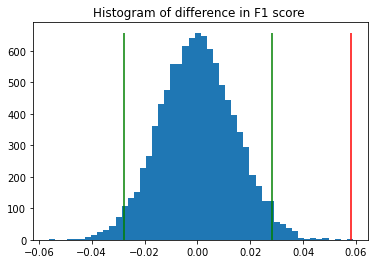

In [239]:
# Generating the difference between score for random boosting and Bagging result
sample_size =10000


        
bootstrapped_boostscore = np.random.normal(0.93/10000,0.01, size=sample_size) #0.93,0.95 comes from the true accuracy result calculated above
bootstrapped_bagscore = np.random.normal(0.95/10000,0.01, size=sample_size)

bootstrapped_diff=bootstrapped_boostscore-bootstrapped_bagscore


# get largest 2.5% and smallest 2.5% of modeled difference
print(np.quantile(randomdiff, q=[0.025, 0.975]))

binsizes, _, _ = plt.hist(randomdiff, bins=50)
plt.vlines(np.quantile(bootstrapped_diff, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrapped_diff, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(f1diff, ymin=0, ymax=np.max(binsizes), color='red')
plt.title("Histogram of difference in F1 score " )
plt.show()



**Conclusion:** As we can see from the plot above, the real value of the absolute of the difference between the f1_score is outside of the green bar,which is the confidence interval. Thus, we could conclude that the bootstrapped confidence interval doesn't contain the true difference value. Thus, it's confident to believe these models are efficative from the f1_score perspective.

In [220]:
# Similarly, I'll run the steps using accuracy_score again



# From previous cell, we know that 
accuracy_bag =0.9381448206135257
accuracy_boost = 0.9561358276940946

accuracy_diff = accuracy_boost - accuracy_bag
accuracy_diff

0.017991007080568888

In [191]:
n_bootstrap = 5000
    bootstrap_accu= np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        sample = cos.purchase.sample(n=len(cos), replace=True)
        est_accu = sample.purchase.mean()
        bootstrap_accu[i] = est_accu

[-0.02801269  0.02797193]


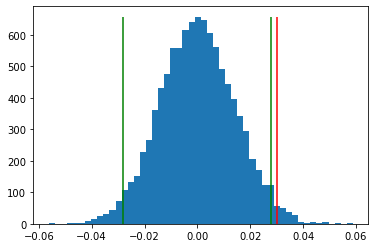

In [232]:
f1_scoreboost = 0.908470005013032
f1_scorebag = 0.9090499248712878


bootstrapped_boost_accu = np.random.normal(0.908470005013032/100,0.01, size=sample_size) #0.909,0.909 comes from the true f1score result calculated above
bootstrapped_bag_accu = np.random.normal(0.9090499248712878/100,0.01, size=sample_size)

bootstrapped_diff_acu=bootstrapped_boost_accu-bootstrapped_bag_accu


# get largest 2.5% and smallest 2.5% of modeled difference
print(np.quantile(bootstrapped_diff_acu, q=[0.025, 0.975]))

binsizes, _, _ = plt.hist(randomdiff, bins=50)
plt.vlines(np.quantile(bootstrapped_diff_acu, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrapped_diff_acu, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(accuracy_diff, ymin=0, ymax=np.max(binsizes), color='red')

plt.show()

**Conclusion:** As we can see from the plot above, the real value of the absolute of the difference between the accuracy score is outside of the green bar,which is the confidence interval. Thus, we could conclude that the bootstrapped confidence interval doesn't contain the true difference value. Thus, it's confident to believe these models are efficative accordingt to the accuracy score perspective.


---
## INTERPRETATION AND CONCLUSION —SUPERVISED LEARNING &ENSEMBLE LEARNING 

Analysing the result of the hypothesis test for using f1 and accuracy, I found out that the most effective model is the **AdaBoost Prediction Model.** The AdaBoost Prediction model's f1_score and accuracy score are not only effective but are also better than the Classifier based on Random Forrest Classification. 

Moreover, both of the ensemble learning model perform better than the single-layer model(which, is normal supervised learning model: Logistic Regression and Decision Tree Method), which corresponds with my assumption in the first place because I'm assuming the single layer classifier is weak due to the unavoidable speciality with data skewdness.

Admittedly, when put into real world, the Prediction Model based on AdaBoost would be comparatively time-consuming, but the accuracy of greater than 95% and the f1 score of greater than 91% are convinsing indicators that the model would excel in its job. 

**Thus, the AdaBoost Method is most preferable in the given context of the research question**

**Although it has lower performance score, the Single Layer Classifier is also informative.** From the logistic regression model I constructed at the first of the project. It's easy to see that the contribution of each factor(predictor in the 'predictor2'(list name)) to the prediction model from the coefficient graph.(Redisplaying it in the cell below)

From the graph, (1)we can see the first_25p, which is the first 25% percentile of price(cheapest group) has the most positive influence, indicating that cheaper price usually leads to more purchase. (2)Event happening in morning and afternoon is likely to have more purchases. (3)The more popular the category(top1c, top3c, etc.), the more likely to have more purchases. (4) Top 50 popular brand is has more purchase than other brand.

**Application in Real Life**
The information given can be crucial to business management in ecommerce, according to the conclusion from the graph. For example, it'll be more profitable for e-commerce platform to have discount events during the morning and the afternoon than other time periods. And it's wise to have bigger discount on factors that have negative coefficient because the higher the price, the fewer the purchase, etc.

All these inferences for ecommerce platform business management corresponds with most of our common sense, such as the influence of price.

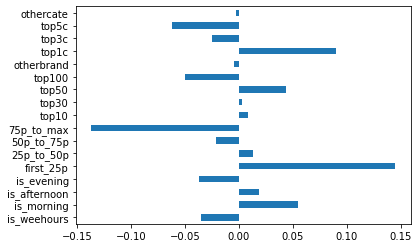

In [242]:

cos3 = pd.DataFrame({'coef':purchase_model.coef_[0][3:]}, index=cos[predictor2].columns)
cos3.plot.barh(legend=False);

---
### Some Other Exploratory Modeling( Not focusing on Predicting)
**K-Means clustering**

1. **user active**
- Monthly active = how many days online per month
- Daily active = number of sessions per day
- Purcase price = total amount of transaction of each user

2. **revenue with frequency level**
- Monthly purchase
- Monthly price
- Monthly view

3. **revenue with rate level**
- Monthly purchase/view rate
- Monthly purchase/cart rate
-Monthly price/purchase rate


**User Active**

<AxesSubplot:>

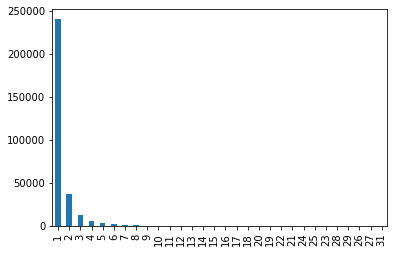

In [107]:
# number of days each participant show up in the given month
id_daycount = cos.groupby(['user_id'])['date'].agg(montly_online_daycnt =('nunique')).sort_values(by=['montly_online_daycnt'])
id_daycount['montly_online_daycnt'].value_counts().plot(kind='bar')

In [108]:
# event number of each participant
id_sessioncount = cos.groupby(['user_id'])['user_session'].agg(monthly_sessioncnt = ('nunique')).sort_values(by=['monthly_sessioncnt'])
id_sessioncount['monthly_sessioncnt'].value_counts(bins=20)

(-1.501, 75.0]      305116
(75.0, 150.0]          172
(150.0, 225.0]          26
(225.0, 300.0]          10
(300.0, 375.0]           4
(375.0, 450.0]           3
(600.0, 675.0]           1
(450.0, 525.0]           1
(1425.0, 1500.0]         1
(825.0, 900.0]           1
(975.0, 1050.0]          1
(675.0, 750.0]           1
(750.0, 825.0]           0
(1350.0, 1425.0]         0
(525.0, 600.0]           0
(900.0, 975.0]           0
(1050.0, 1125.0]         0
(1125.0, 1200.0]         0
(1200.0, 1275.0]         0
(1275.0, 1350.0]         0
Name: monthly_sessioncnt, dtype: int64

<AxesSubplot:>

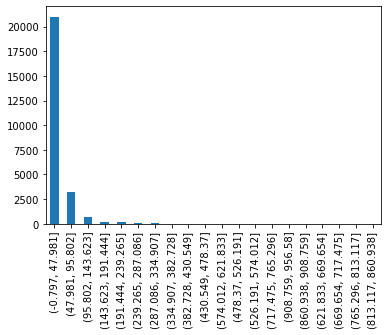

In [109]:
id_totalprice = cos[cos['event_type'].str.contains('purchase')].groupby(['user_id'])['price'].agg(monthly_totalprice = ('sum')).sort_values(by=['monthly_totalprice'])
id_totalprice['monthly_totalprice'].value_counts(bins=20).plot(kind='bar')

In [111]:
# concatenate three dataframe
activeusers = pd.concat([id_sessioncount, id_daycount, id_totalprice], axis=1)
activeusers['monthly_totalprice'].fillna(0, inplace = True)

activeusers.head()

,monthly_sessioncnt,montly_online_daycnt,monthly_totalprice
user_id,,,
465496,2,1,0.0
4661182,1,1,0.0
6217356,1,1,0.0
10280338,2,2,18.1
11253733,1,1,0.0


**Behavior Frequency**

In [113]:
behaviors = cos.groupby(['user_id', 'event_type']).size().unstack(fill_value=0)
price = cos[cos['event_type'].str.contains('purchase')].groupby(['user_id'])['price'].agg('sum')
behaviors = behaviors.merge(price, how = 'left', on = 'user_id')
behaviors['price'].fillna(0, inplace = True)

Text(0.5, 1.0, 'Behavior rate boxplot')

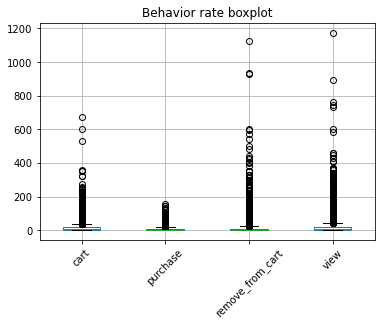

In [120]:
# calculate the three rates
behaviors['monthly_purchaseview'] = behaviors.purchase.div(behaviors.view.replace(0, np.nan))
behaviors['monthly_pricepurchase'] = behaviors.price.div(behaviors.purchase.replace(0, np.nan))
behaviors['monthly_purchasecart'] = behaviors.purchase.div(behaviors.cart.replace(0, np.nan))

# drop nan rows based on the predefined three rates
behaviors = behaviors.dropna(subset=['monthly_purchaseview', 
                                         'monthly_pricepurchase',
                                         'monthly_purchasecart'])

# get the behavior feature at freq and rate level 
behaviorrate = behaviors[['monthly_purchaseview', 'monthly_pricepurchase', 'monthly_purchasecart']]
behaviorfreqency = behaviors[['purchase', 'view', 'price']]

# Visualizing the behavior rate

rate_boxplot = behaviors.boxplot(rot=45, fontsize=10, column = ['cart', 'purchase', 'remove_from_cart', 'view'])
rate_boxplot.set_title('Behavior rate boxplot')




Text(0.5, 1.0, 'Behavior frequency boxplot')

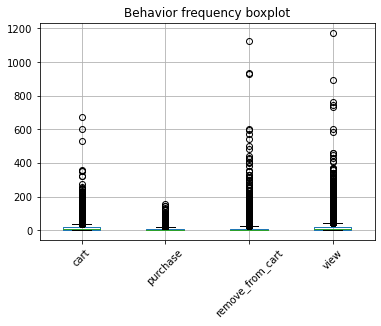

In [121]:
# Visualizing the behavior frequency

frequency_boxplot = behaviors.boxplot(rot=45, fontsize=10, column = ['cart', 'purchase', 'remove_from_cart', 'view'])
frequency_boxplot.set_title('Behavior frequency boxplot')




**Clustering**

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [127]:
# standardize the data before finding the k optimal value
X_activeuser = StandardScaler().fit_transform(activeusers)
X_freq_behavior = StandardScaler().fit_transform(behaviors)
X_rate_behavior = StandardScaler().fit_transform(behaviorrate)

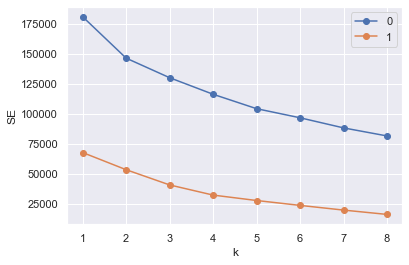

In [128]:
for j, XX in enumerate([X_freq_behavior, X_rate_behavior]): #X_freq_behavior, X_rate_behavior
    SSE=[]
    for i in range(1,9,1):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(XX)
        SSE.append(kmeans.inertia_)
    sns.set()
    plt.plot(range(1,9,1),SSE,marker='o', label = j)
plt.xlabel('k')
plt.ylabel('SE')
plt.legend()

In [135]:

import random
from mpl_toolkits.mplot3d import Axes3D
#import plotly.graph_objs as go
def k_mean_cluster(df, n_cluster, figsize = (6, 6)):
    assert len(df.columns) == 3, "Should be three features"
    X = df.copy()
    
    random.seed(7)
    km = KMeans(n_clusters=n_cluster, 
                init = "k-means++", 
                max_iter = 300, 
                n_init = 10, 
                random_state=0)
    X_standard = StandardScaler().fit_transform(X)
    km.fit(X_standard)
    y_pred = km.predict(X_standard)
    X['y_pred'] = list(y_pred)
    
    feat_columns = df.columns
    colors = sns.color_palette("tab10")[:n_cluster]
    sns.countplot(x = 'y_pred', palette = colors, data = X)
    
    fig = plt.figure(figsize = figsize)
    ax=Axes3D(fig)
    for k in range(n_cluster):
        ax.scatter(X.loc[X.y_pred == k, feat_columns[0]], 
                   X.loc[X.y_pred == k, feat_columns[1]],
                   X.loc[X.y_pred == k, feat_columns[2]], 
                   marker='o', alpha=0.5, color = colors[k], label = f"cluster {k}")
    
    ax.set_xlabel(feat_columns[0])
    ax.set_ylabel(feat_columns[1])
    ax.set_zlabel(feat_columns[2])
    ax.legend(loc='best')
    plt.show()


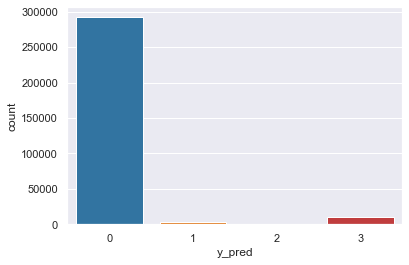

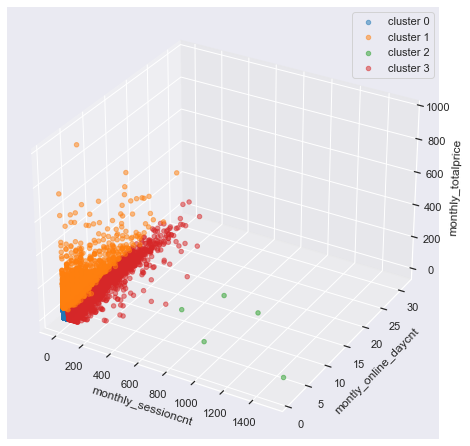

In [139]:
k_mean_cluster(activeusers, 4)


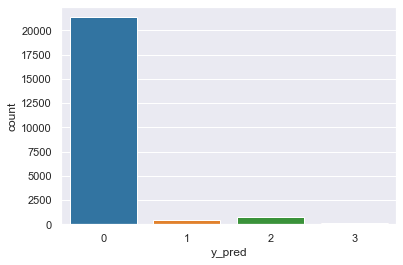

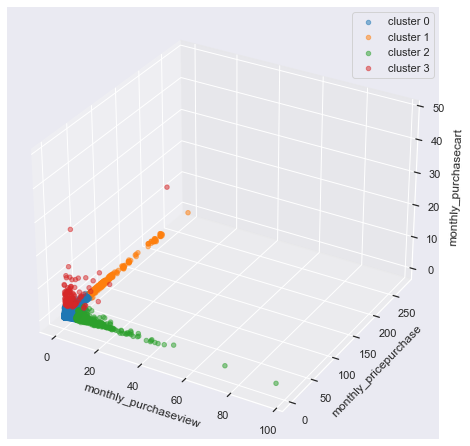

In [136]:
k_mean_cluster(behaviorrate, 4)


----
### Limitations


1. For my research question,I'm interested in the events influencing consumer purchase in cosmetics. This dataset, however, shows purchasing behavior in a specific period. Because the dataset doesn’t reflect the entire period and possible purchases for me to analyze, the relationships/ influence I find might not be generalizable to the entire purchasing cycle.


2. There's no information about the "back story" to make assumption for value apppeared. Let's say if I find a spike in price, I could only see the relationships between the spike(amount purchased) and the current date/ brand/ price. But I can't be certain about what lead to the spike, for example, maybe it's related to specific date where people will buy similar products with similar price. We might just assumed it's influenced by the price. However, the reality might be more related to having a holiday with the need to buy gift, but without the information, the assumption is not easy to verify.


3. Unavoidable Potential Limitation of unevenly distributed target value. Normally, when evaluate the binary output of certain attributes, I could clean the data to ensure a roughly equal distribution between 0 and 1. However, I could not do this in this step after thoughtful consideration. (I also discussed this concern with some of the TAs)This is due to the property of this study: I'm trying to establish a model predicting whether a consumer would purchase a product. In the '0' circumstances, people cart, remove from cart, and view the product. These events are essential of purchasing event. If I remove them from the dataset, I'll get very biased sample. Thus, I decide to continuing include them as '0' in my dataset.


---
##### Some Crazy Thought for Future Study


Trying to use SVM(Suppor Vector Machine) for future data analysis and model constructing.

---
### Reflections about the Project

This project is a really wonderful experience of self-exploring the data science. I learned so much through the design, organization, and execution of this project by myself that I never thought I could. 

I'm so happy for the opportunity to take the INFO2950 class for SP2021 and I think the psets and final project really makes me satisfied, which sounds unbelievable. I build so much confidence in data science and exploring datasets by myself, which is not possible before. 

Eventhough I'm taking the class remotely and finish the project alone, I really received a lot of help from Professor Wilkens, Stephen and a lot of TAs. And I'm very grateful:)

**BIG THANKS to:**
    
    Professor Wilkens, Stephen Cowpar Office Hour!!!

    TAs who helped me throughout the semester: Emma Condie, Heather Ginsburg, Jacob Goldstein, Anders Jensen,  Ethan Ma,  Daniel Riley, Rachel Spivak, Quinn Theobald, Toshi Tokuyama, Vishal Vardhineedi, Chris Wang, Jacob Wise

    Every TA in the class, you guys are amazing:)
   
    Classments who has offered help/ discuss questions together.

---
### References and Acknowledgement

Published papers and Stackoveflow questions:

1. Adjei, I.A. and Karim, R. (2016) An Application of Boots- trapping in Logistic Regression Model. Open Access Library Journal, 3: e3049. http://dx.doi.org/10.4236/oalib.1103049

2. T. G. Dietterich, "Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithms," in Neural Computation, vol. 10, no. 7, pp. 1895-1923, 1 Oct. 1998, doi: 10.1162/089976698300017197.

3. StackOverflow questions:
https://scikit-learn.org/stable/modules/ensemble.html#adaboost
https://stackoverflow.com/questions/22306341/python-sklearn-how-to-calculate-p-values
https://stackoverflow.com/questions/39163354/evaluating-logistic-regression-with-cross-validation
https://stats.stackexchange.com/questions/27750/feature-selection-and-cross-validation
https://stackoverflow.com/questions/53815900/is-it-possible-to-get-the-same-cross-validation-score-for-many-classification-mo


